In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.datasets import mnist
from pylab import rcParams
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K


%matplotlib inline

sns.set(style='white', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 8

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

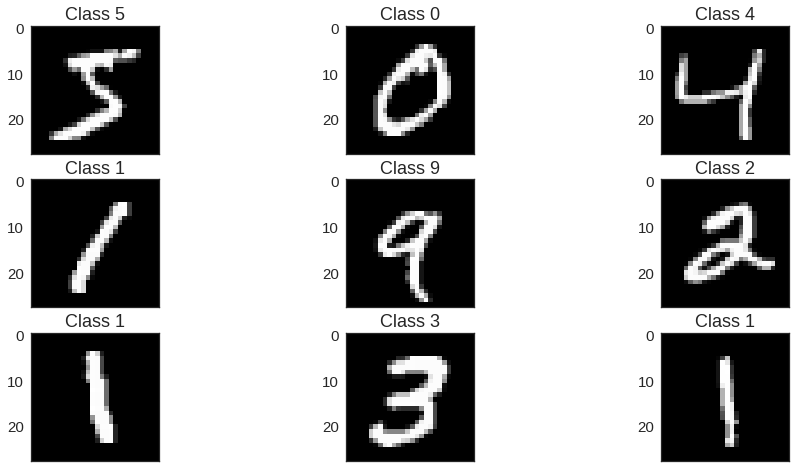

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.title("Class {}".format(y_train[i]))

# What Neural Nets see?

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
digit = X_train[2]
# digit = cv2.imread('penguin.jpg')
# digit = cv2.imread('cat.png')
# digit = cv2.imread('krum.png')

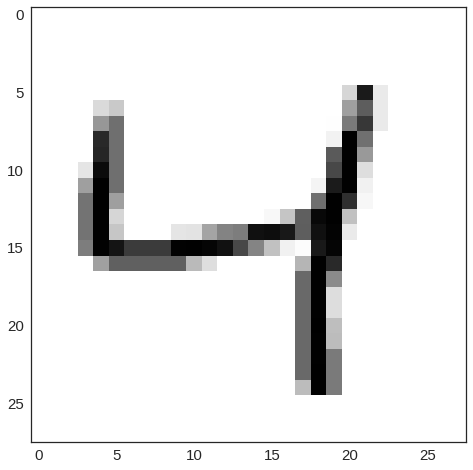

In [6]:

plt.imshow(digit);

In [7]:
def visualize_digit(model, digit):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    digit_batch = np.expand_dims(digit,axis=0)
    conv_digit = model.predict(digit_batch)
    conv_digit = np.squeeze(conv_digit, axis=0)
    print(conv_digit.shape)
    plt.imshow(conv_digit)

In [8]:
def plot_digit(digit):
    plt.imshow(digit, cmap='gray', interpolation='none');

(26, 26, 3)


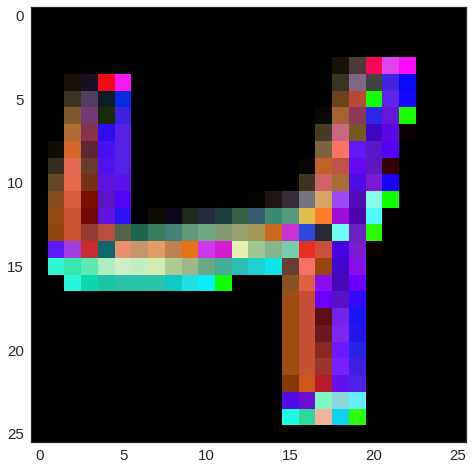

In [9]:
digit = digit.reshape(digit.shape[0], digit.shape[1], 1)

model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))

visualize_digit(model, digit)

(19, 19, 3)


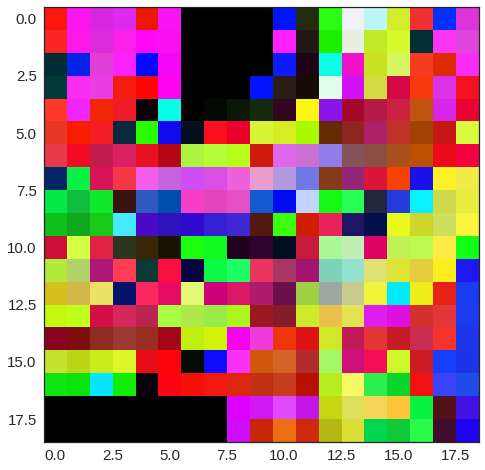

In [10]:
model = Sequential()
model.add(Conv2D(3, (10, 10), input_shape=digit.shape))

visualize_digit(model, digit)

In [11]:
def nice_digit_printer(model, digit):
    '''prints the digit as a 2d array'''
    digit_batch = np.expand_dims(digit,axis=0)
    conv_digit2 = model.predict(digit_batch)

    conv_digit2 = np.squeeze(conv_digit2, axis=0)
    print(conv_digit2.shape)
    conv_digit2 = conv_digit2.reshape(conv_digit2.shape[:2])

    print(conv_digit2.shape)
    plt.imshow(conv_digit2)

(26, 26, 1)
(26, 26)


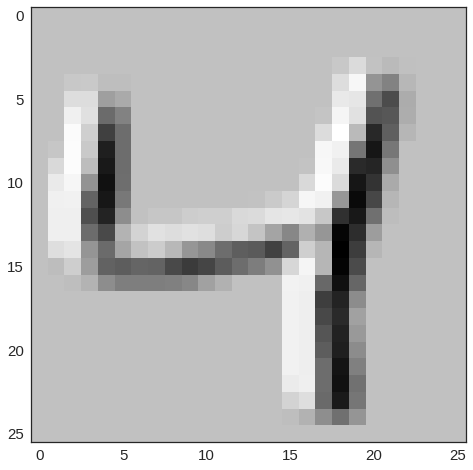

In [12]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))

nice_digit_printer(model, digit)

(17, 17, 1)
(17, 17)


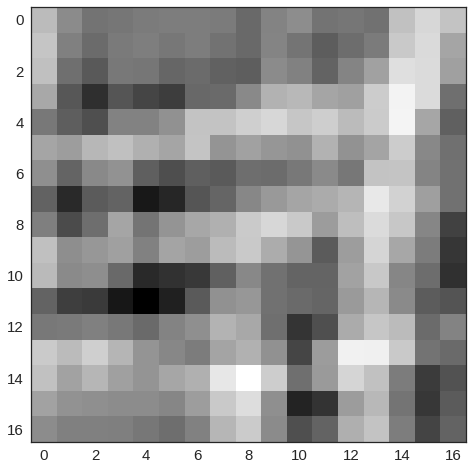

In [13]:
model = Sequential()
model.add(Conv2D(1, (12, 12), input_shape=digit.shape))

nice_digit_printer(model, digit)

(26, 26, 1)
(26, 26)


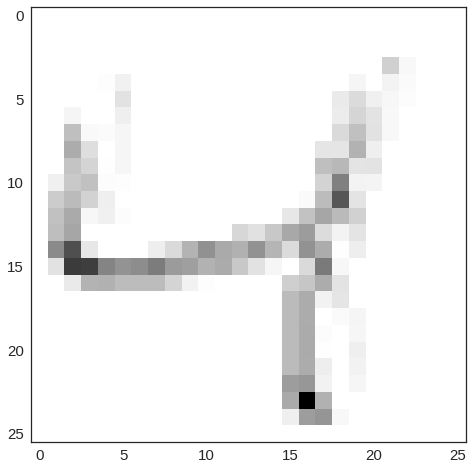

In [14]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))

nice_digit_printer(model, digit)

(26, 26, 3)


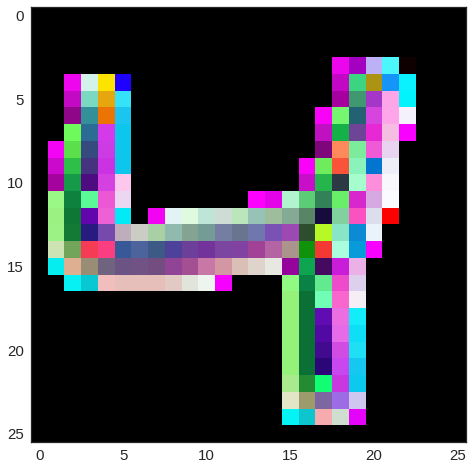

In [15]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))

visualize_digit(model, digit)

(26, 26, 3)


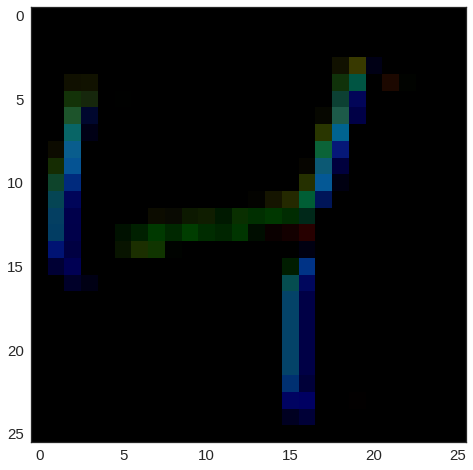

In [16]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))

visualize_digit(model, digit)

# Max Pooling

(8, 8, 1)
(8, 8)


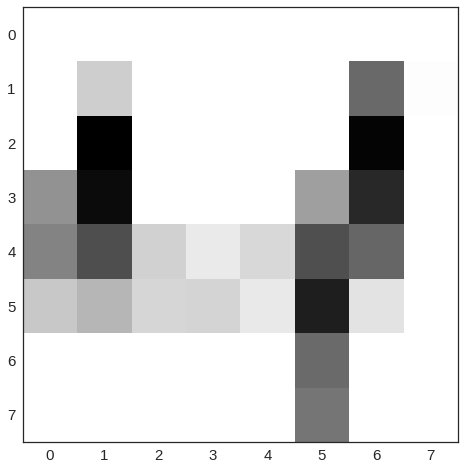

In [17]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

nice_digit_printer(model, digit)

(8, 8, 3)


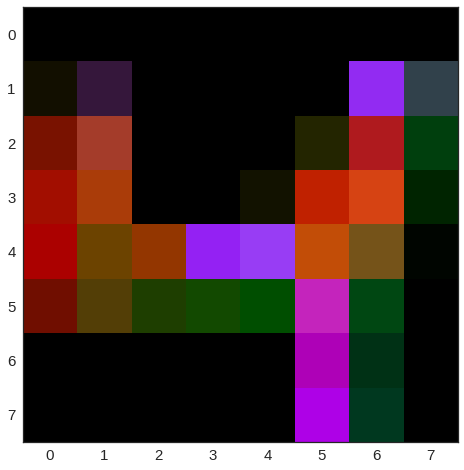

In [18]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_digit(model, digit)

# Activation and Pooling

(8, 8, 1)
(8, 8)


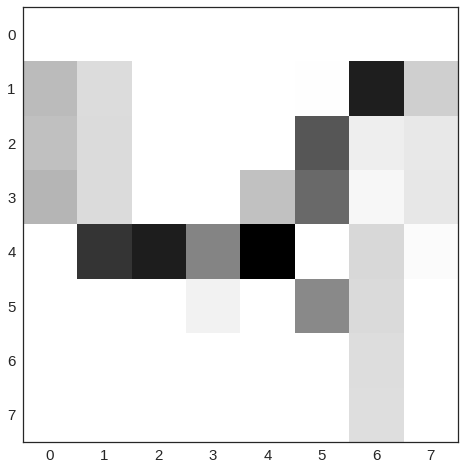

In [19]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

nice_digit_printer(model, digit)

(8, 8, 3)


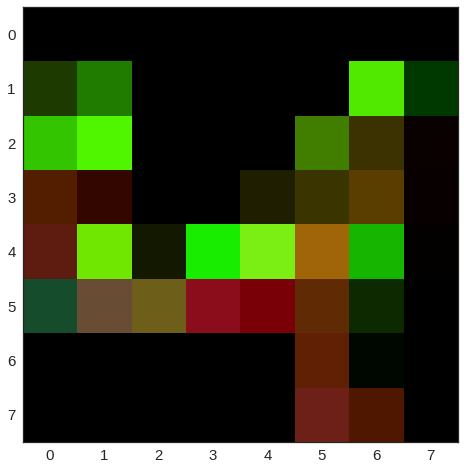

In [20]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_digit(model, digit)

# Going deeper

(3, 3, 1)
(3, 3)


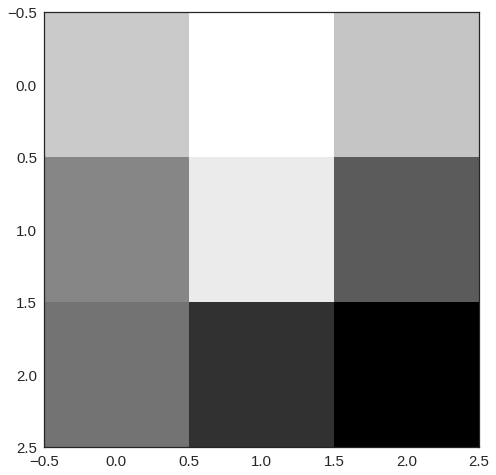

In [21]:

# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Conv2D(3,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=digit.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=digit.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_digit_printer(model, digit)

In [22]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    return layer_dict[layer_name].output

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def visualize_layer(model, layer_name, digit):
    
    layer = get_output_layer(model, layer_name)
    
    input_img = model.input
    input_img_data = np.expand_dims(digit.copy().reshape(28, 28, 1), axis=0)

    kept_filters = []
    for filter_index in range(0, int(layer.shape[-1])):
        loss = K.mean(layer[:, :, :, filter_index])
        grads = K.gradients(loss, input_img)[0]

        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

#             print('Current loss value:', loss_value)
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        if loss_value > 0:
            img = deprocess_image(input_img_data[0])
            kept_filters.append((img, loss_value))
            
    n = 4

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    margin = 5
    width = n * img_cols + (n - 1) * margin
    height = n * img_rows + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 1))
    
    
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_cols + margin) * i: (img_cols + margin) * i + img_cols,
                             (img_rows + margin) * j: (img_rows + margin) * j + img_rows, :] = img
            
    plt.imshow(stitched_filters.reshape(127, 127), cmap='gray', interpolation='none');

# Building a model

In [23]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [24]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name="conv_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



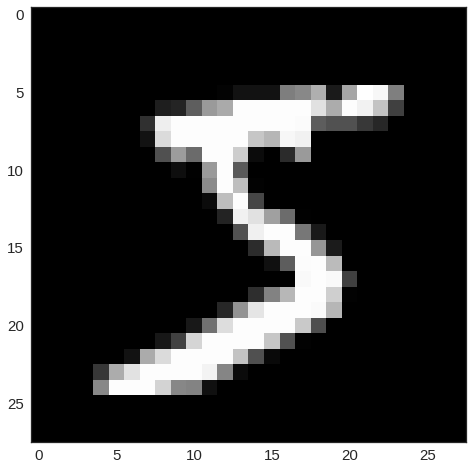

In [26]:
plot_digit(X_train[0].reshape(28, 28))

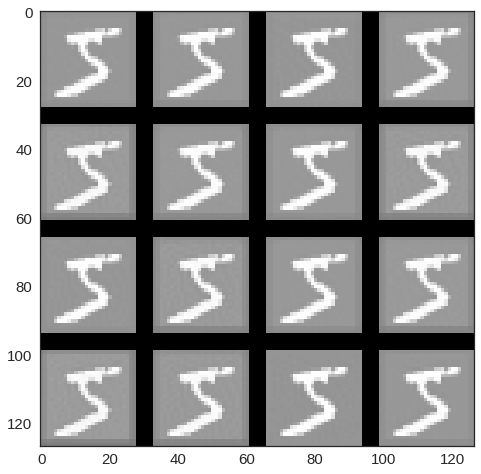

In [27]:
visualize_layer(model, "conv_1", X_train[0])

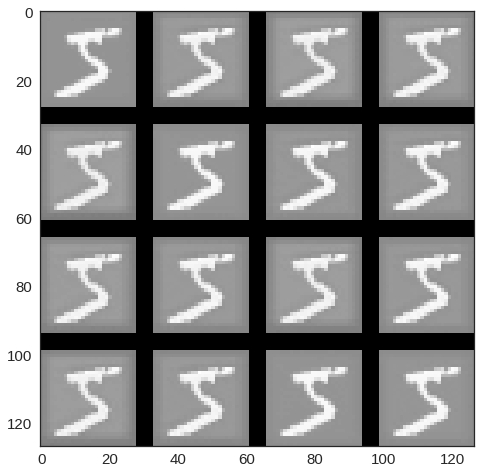

In [28]:
visualize_layer(model, "conv_2", X_train[0])

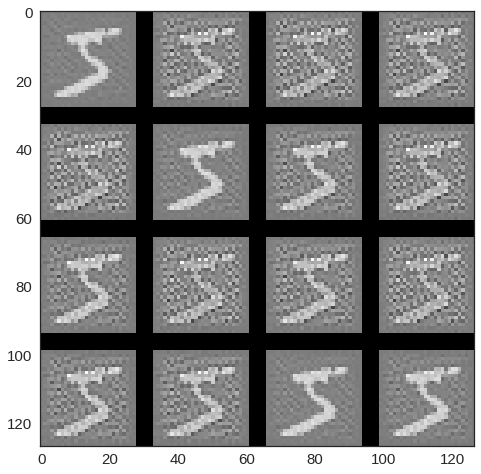

In [29]:
visualize_layer(model, "max_pool_1", X_train[0])

# Training

In [30]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s - loss: 0.3344 - acc: 0.8999 - val_loss: 0.0759 - val_acc: 0.9761
Epoch 2/12
60000/60000 [==============================] - 5s - loss: 0.1141 - acc: 0.9660 - val_loss: 0.0543 - val_acc: 0.9832
Epoch 3/12
60000/60000 [==============================] - 5s - loss: 0.0871 - acc: 0.9739 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 5s - loss: 0.0718 - acc: 0.9785 - val_loss: 0.0391 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 5s - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0355 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 5s - loss: 0.0570 - acc: 0.9830 - val_loss: 0.0319 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 5s - loss: 0.0520 - acc: 0.9846 - val_loss: 0.0329 - val_acc: 0.9887
Epoch 8/12
60000/60000 [==============================] - 5s 

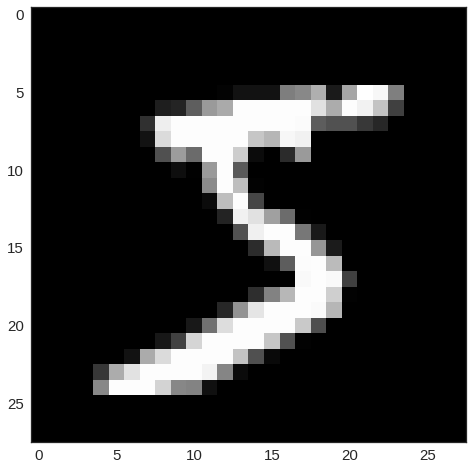

In [31]:
plot_digit(X_train[0].reshape(28, 28))

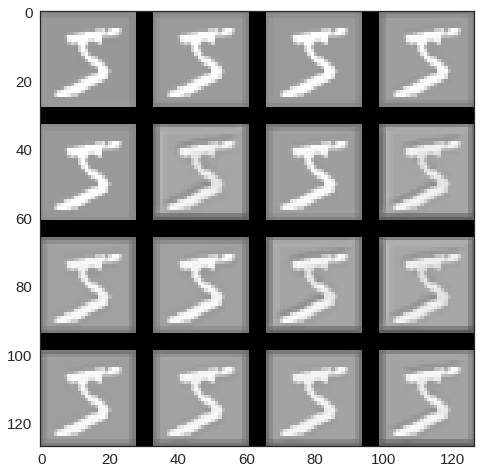

In [32]:
visualize_layer(model, "conv_1", X_train[0])

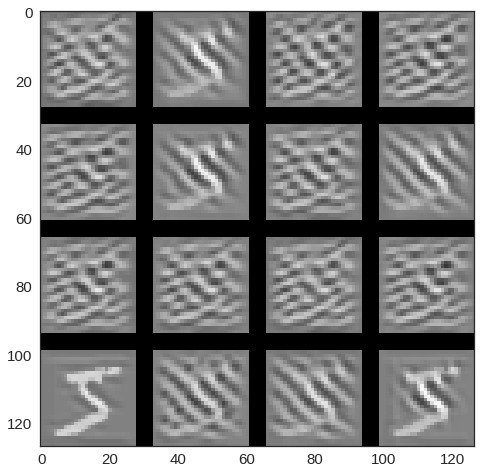

In [33]:
visualize_layer(model, "conv_2", X_train[0])

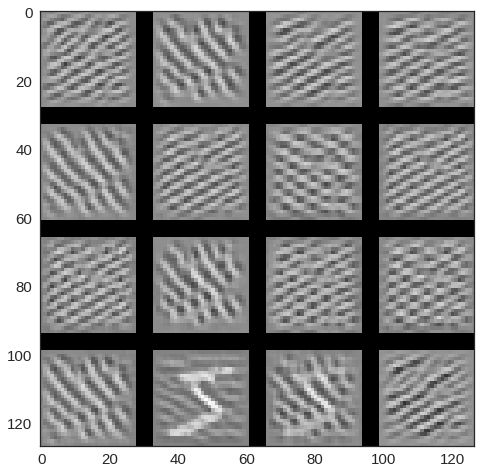

In [34]:
visualize_layer(model, "max_pool_1", X_train[0])

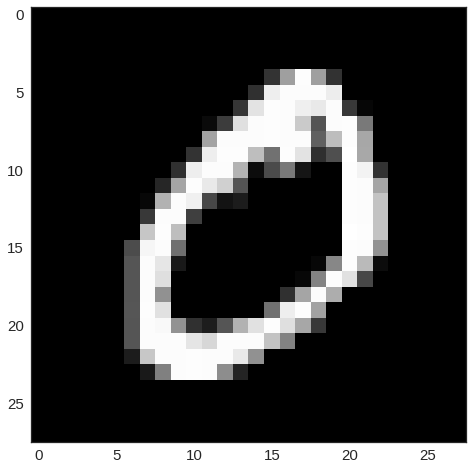

In [35]:
plot_digit(X_train[1].reshape(28, 28))

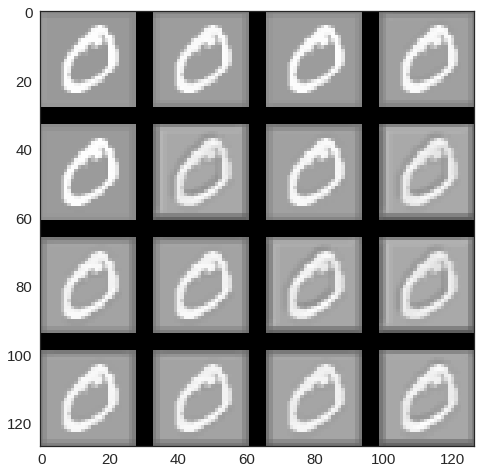

In [36]:
visualize_layer(model, "conv_1", X_train[1])

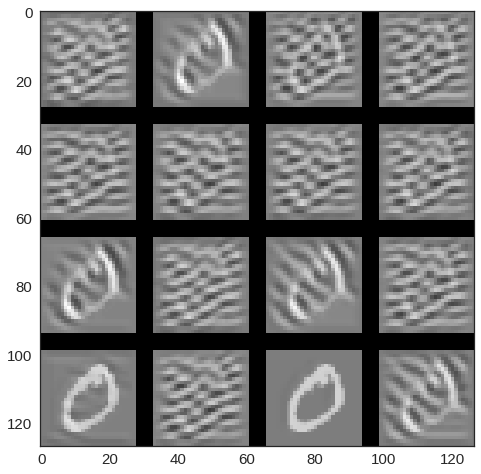

In [37]:
visualize_layer(model, "conv_2", X_train[1])

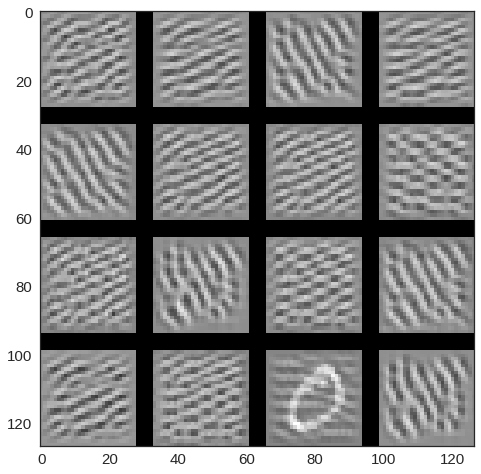

In [38]:
visualize_layer(model, "max_pool_1", X_train[1])

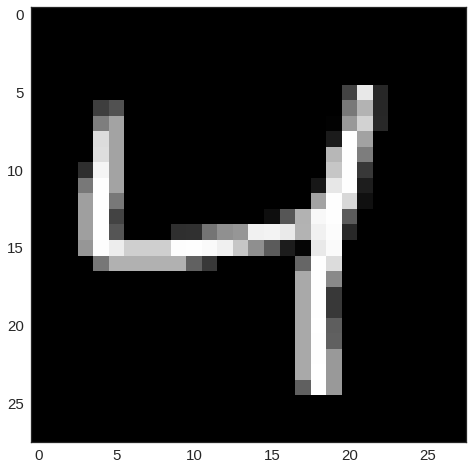

In [39]:
plot_digit(X_train[2].reshape(28, 28))

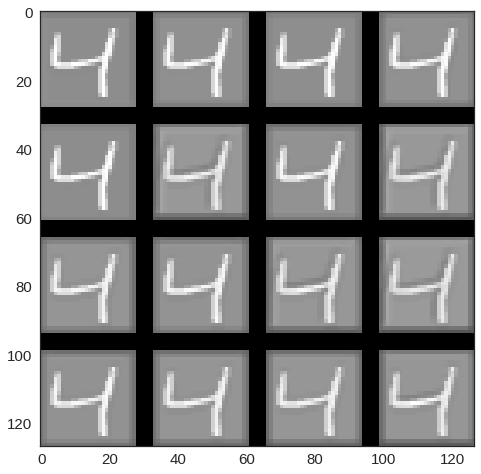

In [40]:
visualize_layer(model, "conv_1", X_train[2])

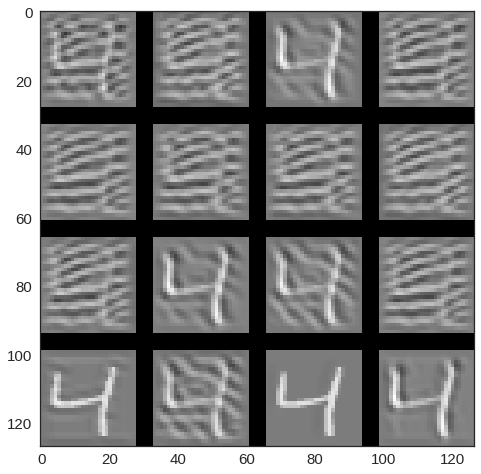

In [41]:
visualize_layer(model, "conv_2", X_train[2])

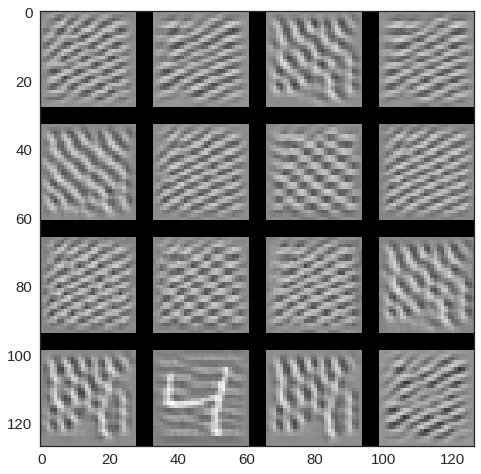

In [42]:
visualize_layer(model, "max_pool_1", X_train[2])

In [43]:
from vis.utils import utils
from vis.visualization import visualize_activation, get_num_filters

In [96]:
layer_name = 'conv_1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

In [97]:
filters = np.arange(get_num_filters(model.layers[layer_idx]))

In [102]:
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx, seed_img=X_train[0]) 
#     img = utils.draw_text(img, str(idx))
    vis_images.append(img)

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]


KeyboardInterrupt: 

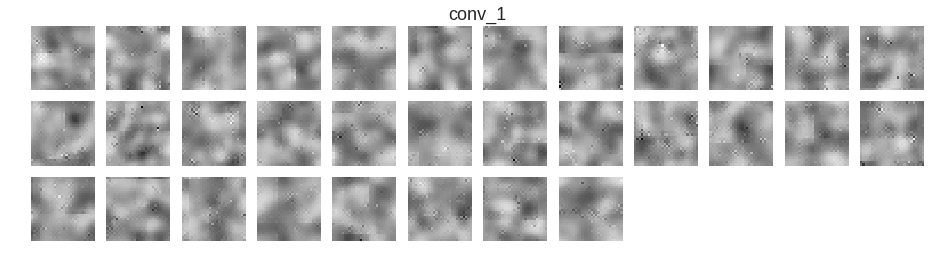

In [101]:
stitched = utils.stitch_images(vis_images,cols=12)    
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title(layer_name)
plt.show()

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]


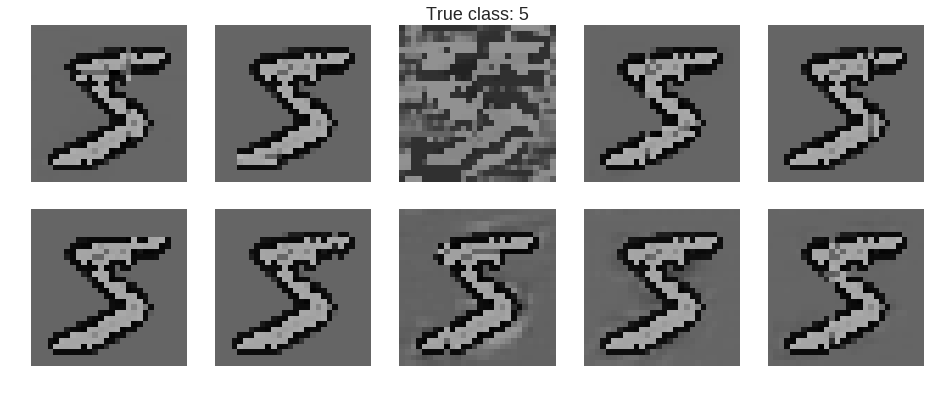

In [94]:
true_class = np.argmax(y_train[0])

layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Visualize couple random categories from imagenet.
# indices = np.random.permutation(1000)[:num_categories]
# indices = [0, 1, 2, 3, 4, 5]
images = []
for idx in np.arange(10):
# for idx in indices:
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=200, seed_img=X_train[0])
#     img = utils.draw_text(img, utils.get_imagenet_label(idx))
    images.append(img)

# Easily stitch images via `utils.stitch_images`
stitched = utils.stitch_images(images)
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title('True class: ' + str(true_class))
plt.show()

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]


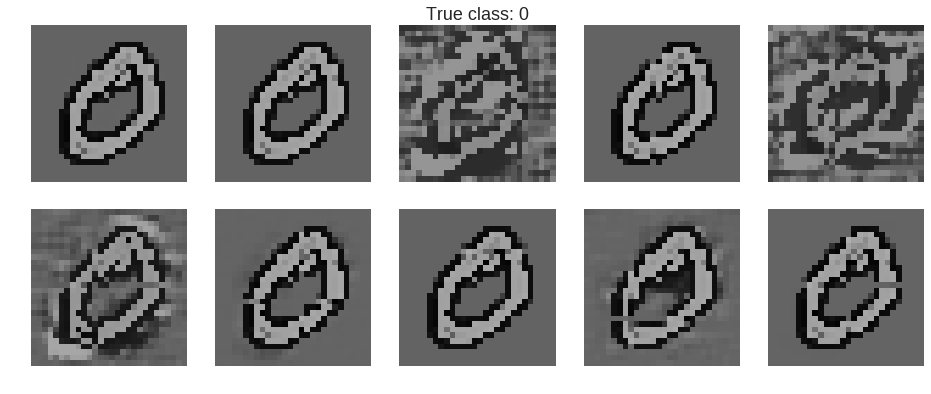

In [95]:
true_class = np.argmax(y_train[1])

layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Visualize couple random categories from imagenet.
# indices = np.random.permutation(1000)[:num_categories]
# indices = [0, 1, 2, 3, 4, 5]
images = []
for idx in np.arange(10):
# for idx in indices:
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=200, seed_img=X_train[1])
#     img = utils.draw_text(img, utils.get_imagenet_label(idx))
    images.append(img)

# Easily stitch images via `utils.stitch_images`
stitched = utils.stitch_images(images)
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title('True class: ' + str(true_class))
plt.show()

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]
Working on filters: [10]
Working on filters: [11]
Working on filters: [12]
Working on filters: [13]
Working on filters: [14]
Working on filters: [15]
Working on filters: [16]
Working on filters: [17]
Working on filters: [18]
Working on filters: [19]
Working on filters: [20]
Working on filters: [21]
Working on filters: [22]
Working on filters: [23]
Working on filters: [24]
Working on filters: [25]
Working on filters: [26]
Working on filters: [27]
Working on filters: [28]
Working on filters: [29]
Working on filters: [30]
Working on filters: [31]
Working on filters: [32]
Working on filters: [33]
Working on filters: [34]
Working on filters: [35]
Working on filters: [36]
Working on filters: [37]
Working on filters: [38]
Working on filters: [39]
Working on

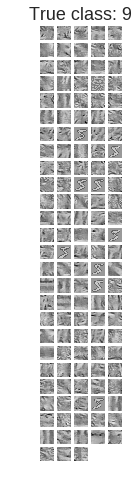

In [88]:
# true_class = 9

layer_name = 'dense_1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Visualize couple random categories from imagenet.
# indices = np.random.permutation(1000)[:num_categories]
# indices = [0, 1, 2, 3, 4, 5]
filters = np.arange(128)
images = []
for idx in filters:
# for idx in indices:
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=200, seed_img=X_train[0])
#     img = utils.draw_text(img, utils.get_imagenet_label(idx))
    images.append(img)

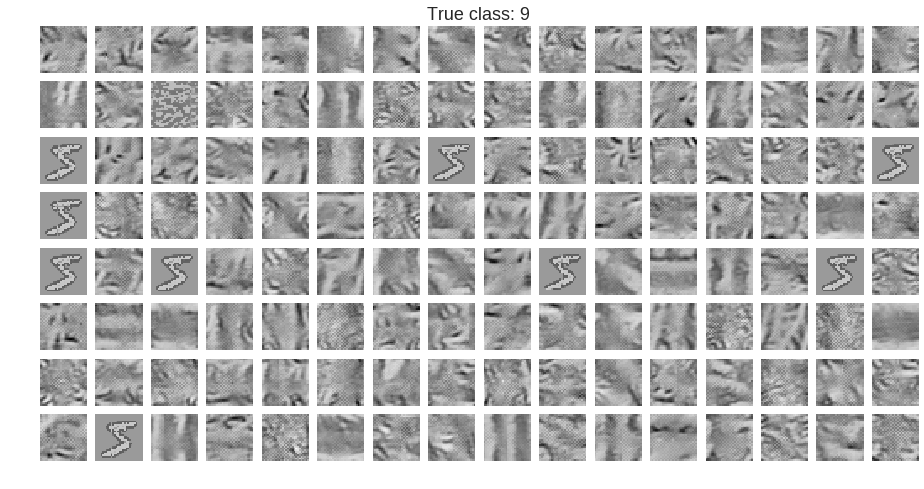

In [93]:
# Easily stitch images via `utils.stitch_images`
stitched = utils.stitch_images(images, cols=16)
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title('True class: ' + str(true_class))
plt.show()

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]


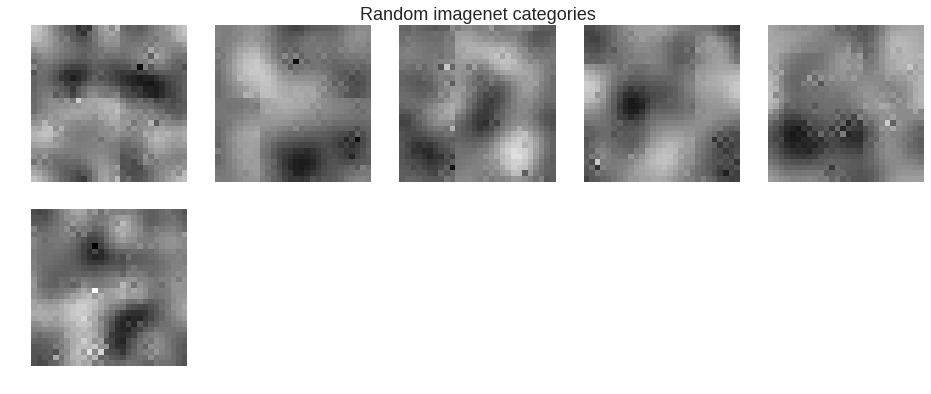

In [58]:
layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Visualize couple random categories from imagenet.
# indices = np.random.permutation(1000)[:num_categories]
indices = [0, 1, 2, 3, 4, 5]
images = []
for idx in indices:
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500)
#     img = utils.draw_text(img, utils.get_imagenet_label(idx))
    images.append(img)

# Easily stitch images via `utils.stitch_images`
stitched = utils.stitch_images(images)
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title('Random imagenet categories')
plt.show()

In [67]:
layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

model.layers[layer_idx].output.shape

TensorShape([Dimension(None), Dimension(10)])

In [61]:
layer_name = 'dense_1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

# Visualize couple random categories from imagenet.
# indices = np.random.permutation(1000)[:num_categories]
filters = np.arange(get_num_filters(model.layers[layer_idx]))
images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500)
#     img = utils.draw_text(img, utils.get_imagenet_label(idx))
    images.append(img)

# Easily stitch images via `utils.stitch_images`
stitched = utils.stitch_images(images)
plt.axis('off')
plt.imshow(stitched.reshape(stitched.shape[0], stitched.shape[1]))
plt.title('Random imagenet categories')
plt.show()

TypeError: unsupported operand type(s) for /: 'Dimension' and 'int'

# Adversarial examples

# Small dataset

# Small models

# Large Models

# Bias & Variance